In [1]:
import graph_builder
import edge_limiter
import importlib
import sys
importlib.reload(sys.modules['graph'])
importlib.reload(sys.modules['edge_limiter'])
importlib.reload(sys.modules['interception'])
importlib.reload(sys.modules['graph_builder'])

<module 'graph_builder' from '/Users/oknyga/www/personal/linear-algebra/robot-navigation/graph_builder.py'>

In [ ]:
import json
set_cnt = 5
with open(f'tests/robot-test-{set_cnt}.json') as json_file:
    robot_data = json.load(json_file)
graph = graph_builder.build_graph_for_robot_data(robot_data,
                                                 intermediate_discovery_mode='full',
                                                 edge_limiter_name='auto')
len(graph.vertices())

5
16.052091864981918


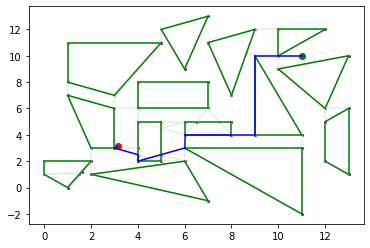

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import dijkstra
importlib.reload(sys.modules['dijkstra'])

for v in graph.vertices():
    plt.plot(v[0], v[1], color='purple', marker='o', markersize=2)
    for n in graph.neighbors(v):
        plt.plot(*zip(v, n), color='#eeeeee')

plt.plot(robot_data['start'][0], robot_data['start'][1], color='green', marker='o', markersize=6)
plt.plot(robot_data['finish'][0], robot_data['finish'][1], color='red', marker='o', markersize=6)
for obstacle in robot_data['obstacles']:
    for pindex in range(len(obstacle)):
        plt.plot(*zip(obstacle[pindex-1], obstacle[pindex]), color='green')
path, cost = dijkstra.find_shortest_path(graph, tuple(robot_data['start']), tuple(robot_data['finish']))
print(set_cnt)
print(cost)
for pindex in range(1, len(path)):
    plt.plot(*zip(path[pindex-1], path[pindex]), color='blue')
plt.show()